## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [53]:
import pandas as pd
df = pd.read_csv('newdf.csv')
df.head(5)

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,...,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,contract
0,J. Todibo,22,79,84,245388,190,88,Right,81,CB,...,1852,409,1,75,47,63,67,80,Nice,2021 ~ 2027
1,B. Verbruggen,19,73,83,258498,194,89,Right,73,GK,...,1127,412,1,75,70,71,76,52,Anderlecht,2020 ~ 2025
2,M. Ugarte,21,79,85,253306,182,77,Right,80,CDM,...,1950,433,1,72,63,71,77,75,Sporting CP,2021 ~ 2026
3,Z. Debast,18,70,84,254262,189,76,Right,72,CDM,...,1805,395,1,67,53,67,67,69,Anderlecht,2019 ~ 2025
4,07 D. Last,37,61,60,21555,182,82,Right,61,GK,...,939,356,3,63,55,63,60,45,Örgryte,2009


### Assessing Data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   ID                        2702 non-null   int64 
 5   Height                    2702 non-null   int64 
 6   Weight                    2702 non-null   int64 
 7   foot                      2702 non-null   object
 8   Best overall              2702 non-null   int64 
 9   Best position             2702 non-null   object
 10  Growth                    2702 non-null   int64 
 11  Value                     2702 non-null   int64 
 12  Wage                      2702 non-null   int64 
 13  Release clause            2702 non-null   int64 
 14  Total attacking         

In [55]:
# Cek apakah ada missing value di dalam dataset
missing_values = df.isnull().sum()
print(missing_values)

# Jika ingin melihat total jumlah missing value di seluruh dataset
total_missing = df.isnull().sum().sum()
print(f'Total missing values: {total_missing}')

print("Jumlah duplikasi: ", df.duplicated().sum())

name                    0
Age                     0
Overall rating          0
Potential               0
ID                      0
                       ..
Passing / Kicking       0
Dribbling / Reflexes    0
Defending / Pace        0
team                    0
contract                0
Length: 65, dtype: int64
Total missing values: 0
Jumlah duplikasi:  0


In [56]:
df.isna().sum()

name                    0
Age                     0
Overall rating          0
Potential               0
ID                      0
                       ..
Passing / Kicking       0
Dribbling / Reflexes    0
Defending / Pace        0
team                    0
contract                0
Length: 65, dtype: int64

In [57]:
print("Jumlah duplikasi: ",df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi

In [58]:
df.describe()

,Age,Overall rating,Potential,ID,Height,Weight,Best overall,Growth,Value,Wage,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
count,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2.702000e+03,2702.000000,...,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000
mean,23.515914,71.976684,78.401925,237167.354552,181.498890,74.891562,73.208734,6.425241,1.039336e+07,27217.561066,...,14.232420,14.465581,1765.961880,389.003701,1.335677,73.003701,59.917839,64.500000,70.211695,53.787195
std,4.416439,7.000437,5.549598,30408.694874,6.905119,7.265658,6.821365,5.549561,1.612582e+07,38354.393778,...,15.743596,16.374078,254.447228,39.500603,0.713373,10.067892,14.266410,9.768393,9.018696,17.897531
min,16.000000,48.000000,56.000000,41.000000,156.000000,52.000000,49.000000,-7.000000,0.000000e+00,0.000000,...,2.000000,2.000000,815.000000,263.000000,1.000000,30.000000,21.000000,30.000000,33.000000,15.000000
25%,20.000000,67.000000,75.000000,227704.750000,176.000000,70.000000,68.000000,1.000000,1.700000e+06,4000.000000,...,8.000000,8.000000,1637.000000,362.000000,1.000000,67.000000,51.000000,58.000000,65.000000,38.000000
50%,23.000000,72.000000,79.000000,242172.000000,182.000000,75.000000,73.500000,6.000000,3.800000e+06,13000.000000,...,10.000000,11.000000,1796.500000,390.500000,1.000000,74.000000,63.000000,65.000000,71.000000,57.000000
75%,26.000000,77.000000,82.000000,256786.250000,187.000000,80.000000,78.000000,10.000000,1.250000e+07,36000.000000,...,13.000000,13.000000,1938.000000,417.000000,1.000000,80.000000,71.000000,71.000000,76.000000,69.000000
max,44.000000,91.000000,95.000000,275248.000000,204.000000,102.000000,92.000000,26.000000,1.905000e+08,450000.000000,...,90.000000,90.000000,2324.000000,495.000000,5.000000,97.000000,92.000000,93.000000,94.000000,89.000000


Mengapus kolom yang tidak dibutuhkan

In [59]:
# Dropping the specified columns from the dataset
columns_to_drop = ['Overall rating', 'Potential', 'ID', 'Best overall', 'Growth', 'Total stats', 'Base stats','Total attacking','Total movement','Total mentality','Total defending','Total goalkeeping','International reputation','contract','Total skill','Total power']
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns are removed
df.head()

,name,Age,Height,Weight,foot,Best position,Value,Wage,Release clause,Crossing,...,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team
0,J. Todibo,22,190,88,Right,CB,24500000,37000,48400000,49,...,13,11,8,13,75,47,63,67,80,Nice
1,B. Verbruggen,19,194,89,Right,GK,5500000,6000,9400000,10,...,70,71,68,76,75,70,71,76,52,Anderlecht
2,M. Ugarte,21,182,77,Right,CDM,26000000,11000,57200000,58,...,10,16,8,13,72,63,71,77,75,Sporting CP
3,Z. Debast,18,189,76,Right,CDM,3500000,3000,7400000,69,...,6,15,6,5,67,53,67,67,69,Anderlecht
4,07 D. Last,37,182,82,Right,GK,0,0,0,35,...,55,63,70,60,63,55,63,60,45,Örgryte


In [60]:
# Function to convert currency values to numeric
def convert_currency(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace('€', '').replace(',', '.').strip()
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    return float(value)

# Convert currency columns to numeric for calculations
df['Value_numeric'] = df['Value'].apply(convert_currency)
df['Wage_numeric'] = df['Wage'].apply(convert_currency)
df['Release_clause_numeric'] = df['Release clause'].apply(convert_currency)

# Handle missing values with mean imputation
df['Value_numeric'].fillna(df['Value_numeric'].mean(), inplace=True)
df['Wage_numeric'].fillna(df['Wage_numeric'].mean(), inplace=True)
df['Release_clause_numeric'].fillna(df['Release_clause_numeric'].mean(), inplace=True)

# Function to format currency values for visualization
def format_euro(value):
    if pd.isna(value):
        return np.nan
    if value >= 1e6:
        return f"€{value / 1e6:.1f}M"
    elif value >= 1e3:
        return f"€{value / 1e3:.1f}K"
    return f"€{value:.0f}"

# Create formatted columns for visualization
df['Value_formatted'] = df['Value_numeric'].apply(format_euro)
df['Wage_formatted'] = df['Wage_numeric'].apply(format_euro)
df['Release_clause_formatted'] = df['Release_clause_numeric'].apply(format_euro)

df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6484\1939418009.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value_numeric'].fillna(df['Value_numeric'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6484\1939418009.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

,name,Age,Height,Weight,foot,Best position,Value,Wage,Release clause,Crossing,...,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,Value_numeric,Wage_numeric,Release_clause_numeric,Value_formatted,Wage_formatted,Release_clause_formatted
0,J. Todibo,22,190,88,Right,CB,24500000,37000,48400000,49,...,63,67,80,Nice,24500000.0,37000.0,48400000.0,€24.5M,€37.0K,€48.4M
1,B. Verbruggen,19,194,89,Right,GK,5500000,6000,9400000,10,...,71,76,52,Anderlecht,5500000.0,6000.0,9400000.0,€5.5M,€6.0K,€9.4M
2,M. Ugarte,21,182,77,Right,CDM,26000000,11000,57200000,58,...,71,77,75,Sporting CP,26000000.0,11000.0,57200000.0,€26.0M,€11.0K,€57.2M
3,Z. Debast,18,189,76,Right,CDM,3500000,3000,7400000,69,...,67,67,69,Anderlecht,3500000.0,3000.0,7400000.0,€3.5M,€3.0K,€7.4M
4,07 D. Last,37,182,82,Right,GK,0,0,0,35,...,63,60,45,Örgryte,0.0,0.0,0.0,€0,€0,€0


## Exploratory Data Analysis (EDA)

In [61]:
# Mengelompokkan pemain berdasarkan kategori usia
bins = [15, 20, 25, 30, 35, 40, 45]  # Batas rentang usia
labels = [1, 2, 3, 4, 5, 6]  # Label untuk setiap kategori
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Mapping kategori usia ke deskripsi
Age_labels = {
    1: '16,17,18,19,20',
    2: '21,22,23,24,25',
    3: '26,27,28,29,30',
    4: '31,32,33,34,35',
    5: '36,37,38,39,40',
    6: '41,42,43,44'
}
df['Age_label'] = df['Age_category'].map(Age_labels)


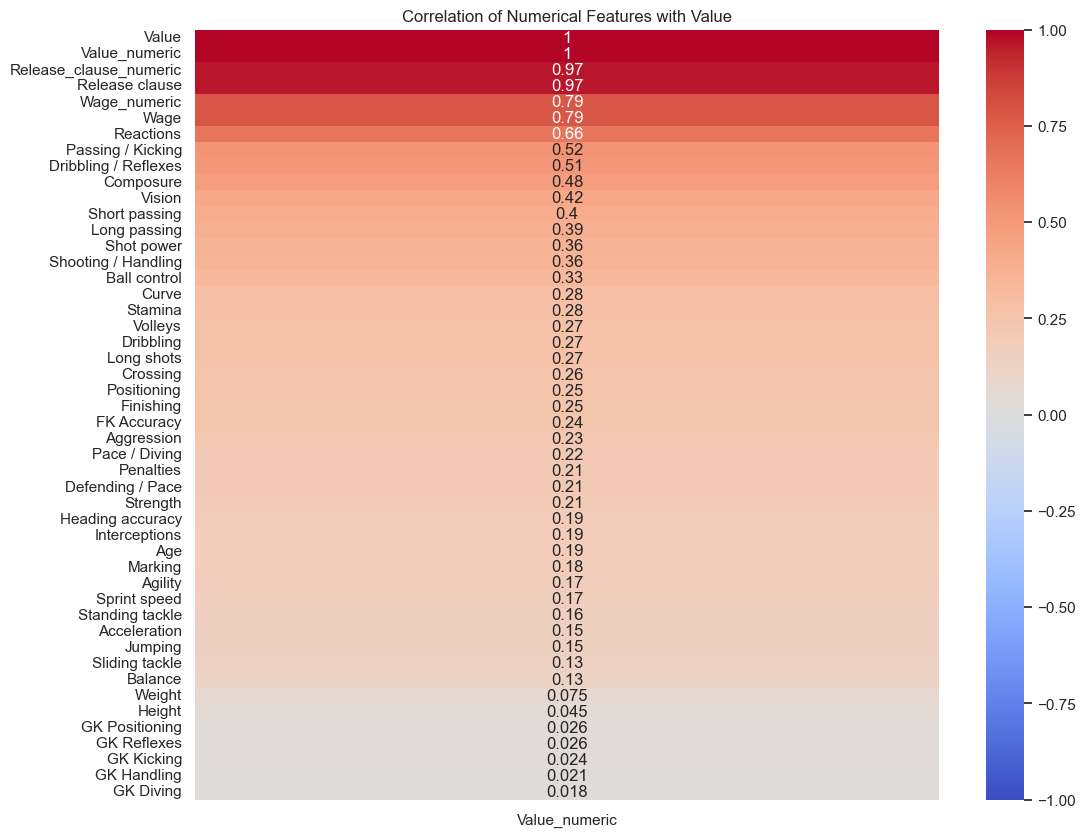

In [62]:
# Melakukan analisis korelasi
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

if 'Value_numeric' in df.columns:
    # Hitung matriks korelasi
    correlation_matrix = df[numerical_cols].corr()

    # Plot heatmap korelasi dengan 'Value_numeric'
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix[['Value_numeric']].sort_values(by='Value_numeric', ascending=False), 
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation of Numerical Features with Value')
    plt.show()
else:
    print("Kolom 'Value_numeric' tidak ditemukan dalam dataset.")


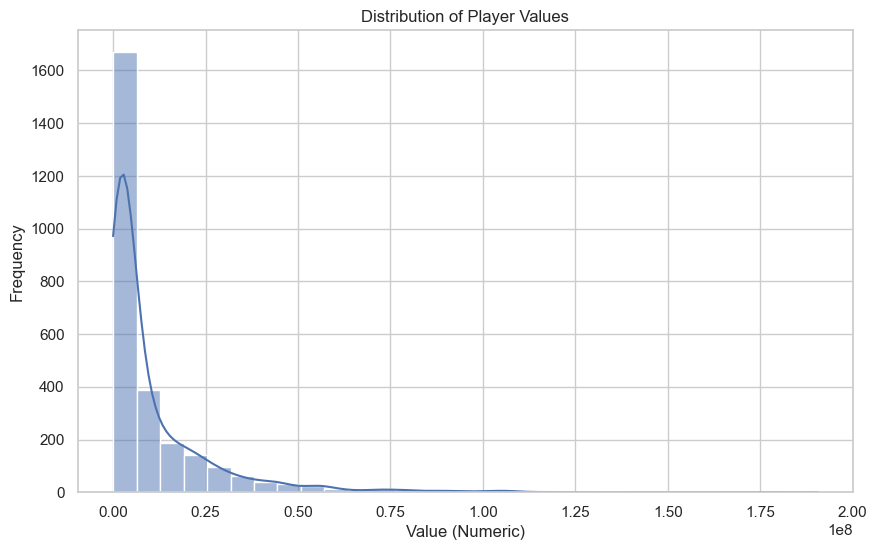

In [63]:
# Visualisasi distribusi Value_numeric
plt.figure(figsize=(10, 6))
sns.histplot(df['Value_numeric'], bins=30, kde=True)
plt.title('Distribution of Player Values')
plt.xlabel('Value (Numeric)')
plt.ylabel('Frequency')
plt.show()

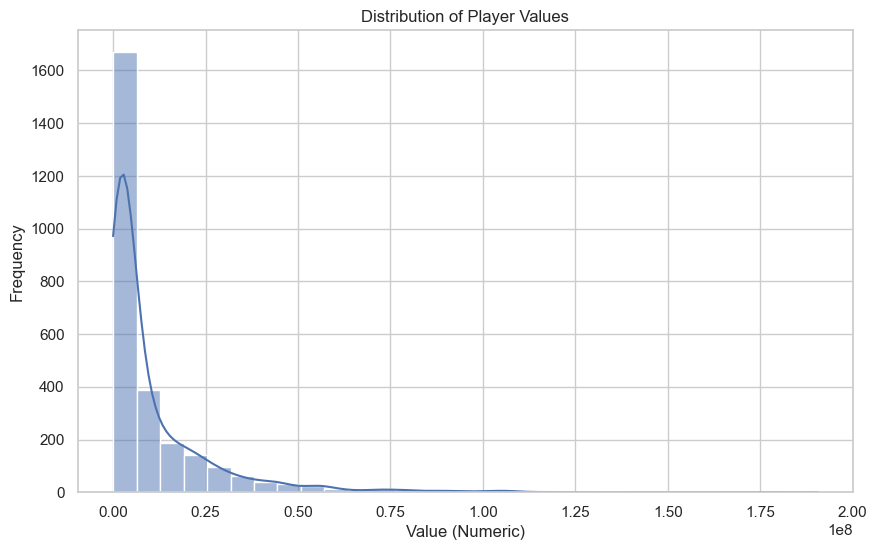

In [64]:
# Visualisasi distribusi Value dengan format mata uang
plt.figure(figsize=(10, 6))
sns.histplot(df['Value_numeric'], bins=30, kde=True)
plt.title('Distribution of Player Values')
plt.xlabel('Value (Numeric)')
plt.ylabel('Frequency')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6484\3363005325.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Best position', y='Value_numeric', data=df, estimator=lambda x: sum(x) / len(x), ci=None)


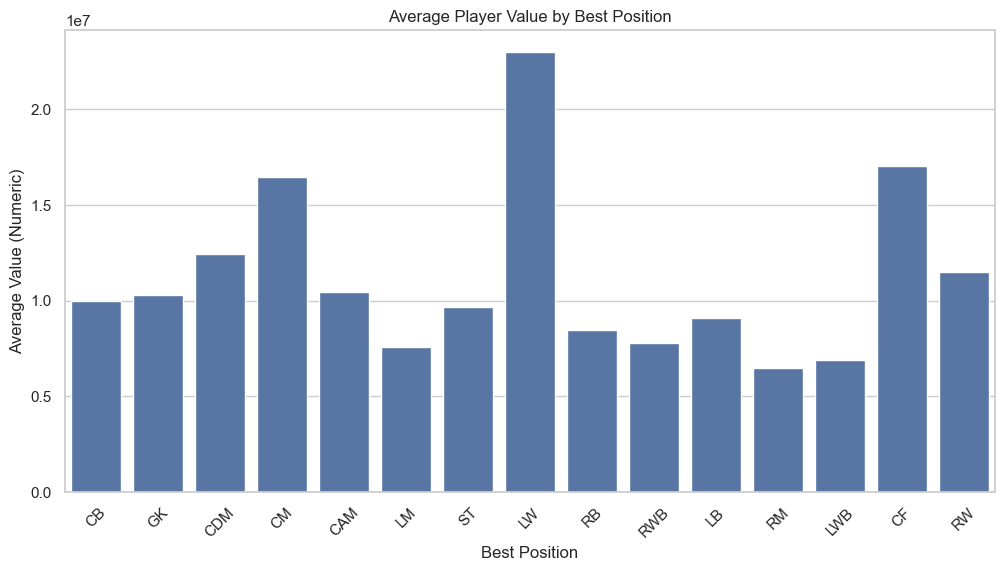

In [65]:
# Average Player Value by Best Position
plt.figure(figsize=(12, 6))
sns.barplot(x='Best position', y='Value_numeric', data=df, estimator=lambda x: sum(x) / len(x), ci=None)
plt.title('Average Player Value by Best Position')
plt.xlabel('Best Position')
plt.ylabel('Average Value (Numeric)')
plt.xticks(rotation=45)
plt.show()


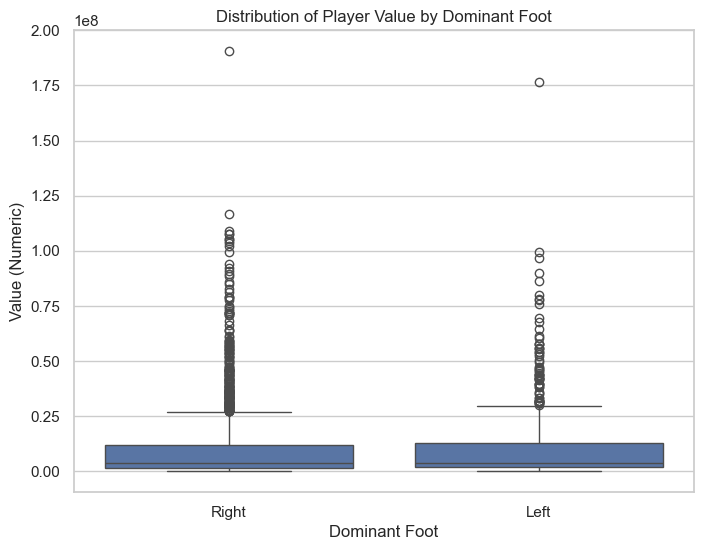

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='foot', y='Value_numeric', data=df)
plt.title('Distribution of Player Value by Dominant Foot')
plt.xlabel('Dominant Foot')
plt.ylabel('Value (Numeric)')
plt.show()

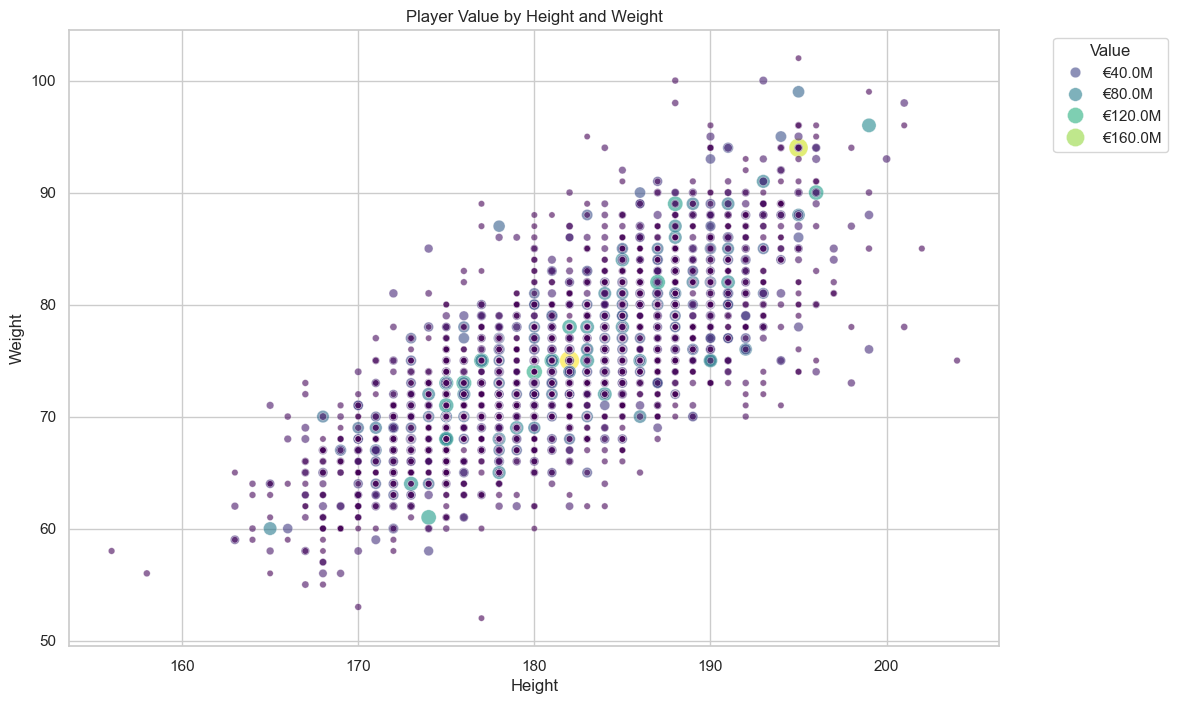

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert currency values to numeric
def convert_currency(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace('€', '').replace(',', '.').strip()
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    return float(value)

# Function to format currency values for visualization
def format_euro(value):
    if pd.isna(value):
        return np.nan
    if value >= 1e6:
        return f"€{value / 1e6:.1f}M"
    elif value >= 1e3:
        return f"€{value / 1e3:.1f}K"
    return f"€{value:.0f}"

# Convert currency columns to numeric for calculations
df['Value_numeric'] = df['Value'].apply(convert_currency)

# Create formatted column for visualization
df['Value_formatted'] = df['Value_numeric'].apply(format_euro)

# Plot Player Value by Height and Weight
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Height', y='Weight', hue='Value_numeric', size='Value_numeric', 
                          data=df, sizes=(20, 200), alpha=0.6, palette='viridis')

# Modify the legend
handles, labels = scatter.get_legend_handles_labels()
labels = [format_euro(float(label)) for label in labels[1:]]  # Skip the first label (size)

# Create custom legend
scatter.legend(handles=handles[1:], labels=labels, title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Player Value by Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


## Conclusion

In [70]:
#Membuat Model Machine Learning numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['Age', 'Height', 'Weight', 'Value', 'Wage', 'Release clause', 'Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing tackle', 'Sliding tackle', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Value_numeric', 'Wage_numeric', 'Release_clause_numeric']


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Menentukan fitur dan target untuk model
selected_features = ['Age', 'Height', 'Weight', 'Wage', 'Release clause', 'Crossing', 'Finishing', 'Heading accuracy', 
                     'Short passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 
                     'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Shot power', 'Jumping', 
                     'Stamina', 'Strength', 'Long shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 
                     'Penalties', 'Composure', 'Marking', 'Standing tackle', 'Sliding tackle', 'GK Diving', 'GK Handling', 
                     'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 
                     'Dribbling / Reflexes', 'Defending / Pace', 'Wage_numeric', 'Release_clause_numeric']

# Mengasumsikan 'data' adalah DataFrame yang sudah di-load sebelumnya
X = df[selected_features]
y = df ['Value_numeric']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Memprediksi nilai pada data uji
y_pred = model.predict(X_test)

# Evaluasi model menggunakan metrik performa
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Menyimpan model Random Forest yang telah dilatih ke dalam file 'random_forest_model.pkl'
joblib.dump(model, 'random_forest_model.pkl')

print("Model telah disimpan ke dalam file 'random_forest_model.pkl'.")


MAE: 1300296.765249538
MSE: 11395023682111.83
RMSE: 3375651.5937092546
R-squared: 0.964831102539643
Model telah disimpan ke dalam file 'random_forest_model.pkl'.


In [68]:
# Menyimpan DataFrame yang telah dibersihkan dan diproses ke dalam file CSV
df.to_csv('data_cleaned.csv', index=False)

print("Data telah disimpan sebagai 'data_cleaned.csv'")


Data telah disimpan sebagai 'data_cleaned.csv'
